# Class 20: Network Sampling (Theory)

Goal of today's class:
1. Introduce biases that emerge when sampling networks
2. Highlight several key sampling approaches

*Acknowledgement: This entire lesson is based on material created by Matteo Chinazzi and Qian Zhang in a previous version of this course.*
__________

## Definitions

The ***input network*** is a graph $G = (V,E)$ where $V$ represents the set of nodes and $E$ the set of (possibly ordered) edges. We will refer to $G$ as the ***population graph***.

The number of nodes in the graph is denoted by $N = |V|$ and the number of edges is denoted by $M = |E|$.

A ***topological property*** of the graph $G$ is denoted by $\eta (G)$. $\eta (G)$ can be a _point statistic_ such as the average degree of the nodes in $V$ or the global clustering coefficient of the graph, or a _distribution_ such as the degree distribution or the clustering distribution. 

A ***network sampling process*** $\sigma$ is an algorithm that randomly selects a sample $S$ from the original graph $G$, i.e. $\sigma(G) = S$. The sample $S$ can represent a subset of nodes $V_s$ of $G$ when $S=V_s \subset V$, a subset of edges $E_s$ of $G$ when $S = E_s \subset E$, or a subgraph $G_s$ of $G$ when $S = G_s \subset G$, where   $G_s \equiv (V_s,E_s)$. We will refer to $G_s$ as a ***sampled graph***.

## Horvitz-Thompson Estimator

Let $U$ be a population of size $N$ (e.g. Facebook users, Twitter users, etc..) and let $y_i$ be a variable of interest associated to each individual $i$ in the population $U$ (e.g. number of friends, number of followers, etc..). Let us denote with $\tau$ the total and with $\mu$ the average of the $y_i$'s values, i.e. $\tau = \sum_i y_i$ and $\mu = \tau/N$. Let us also denote with $S$ a sample of $n$ units from population $N$ and assume that for each unit $i$ in sample $S$ we observe the value $y_i$. Then, we can use the ***Horvitz-Thompson estimator*** to estimate the value of $\tau$ and $\mu$ from the random sample $S$:

$$ \hat{\tau}_\pi = \sum_{i \in S} \frac{y_i}{\pi_i} ,$$

$$ \hat{\mu}_\pi = \frac{\hat{\tau}_\pi }{N} ,$$

where $\pi_{i}$ denotes the _inclusion probability_ of unit $i$ in the sample $S$.

## Classes of Sampling Methods
1. ***Node Selection***: a subset of nodes is sampled;
2. ***Edge Selection***: a subset of edges is sampled;
2. ***Topology-based Sampling*** (exploration sampling): the topology of the population graph is used to extract the sampled graph.

___________

## Induced Subgraph Sampling

![](images/InducedSubgraphSampling.png)



***Induced subgraph sampling*** consists in drawing at random $n$ vertices from a graph of order $N_v$. In particular, let us denote with $G = (V,E)$ the original graph and with $G_s = (V_s,E_s)$ the sampled (sub)graph. Then, the set $V_s$ includes the $n$ nodes randomly drawn from $V$ and $E_s$ contains all the edges $e_{i,j}$ such that both $i$ and $j$ belong to $V_s$.


In this case, the _vertex inclusion probability_ is equal to $\pi_i = \frac{n}{N_v};$ while the _edge inclusion probability_ is equal to: $ \pi_{e_{i,j}} = \frac{n(n-1)}{N_v(N_v-1)}$, $\forall i \in V$, and $\forall e_{i,j} \in E$.

#### Vertex inclusion probability - proof

Given that our sample size is $n$, we can extract up to $\binom{N_v}{n}$ different samples if we do not impose any contraint on whether or not a specific node is selected. However, if we do impose that node $i$ has to be included, then the total number of possible samples becomes $\binom{N_v-1}{n-1}$.

Therefore, the vertex inclusion probability of a generic node $i$ is:
$$ \pi_i = \frac{\binom{N_v-1}{n-1}}{\binom{N_v}{n}} = \frac{\frac{(N_v-1)!}{(n-1)!(N_v-n)!}}{\frac{N_v!}{n!(N_v-n)!}} = \frac{(N_v-1)!}{(n-1)!} \frac{n!}{N_v!} = \frac{n}{N_v} $$

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('axes', axisbelow=True)
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')

In [2]:
N = 1000
M = 50000
average_degree = 2*M/N
print(average_degree)

p = average_degree/(N-1)
G_er = nx.erdos_renyi_graph(N,p)
G_ws = nx.watts_strogatz_graph(N, int(average_degree), p=0.01)

print("Average degree ER:", np.mean(list(dict(G_er.degree()).values())))
print("Average degree WS:",  np.mean(list(dict(G_ws.degree()).values())))

100.0
Average degree ER: 100.736
Average degree WS: 100.0


In [3]:
from numpy.random import choice

def induced_subgraph_sampling(A,n):
    adj_list = from_adj_matrix_to_adj_list(A,is_directed=False)
    nodes = list(adj_list.keys())
    V_s = choice(nodes, size = n, replace=False)
    E_s = {(node_i,node_j) if node_i < node_j else (node_j,node_i)
           for node_i in V_s for node_j in adj_list[node_i] if node_j in V_s}
    return V_s, E_s

In [4]:
def induced_subgraph_sampling(G, n):
    """
    Samples an induced subgraph of `n` nodes from the input graph `G`.
    
    Parameters
    ----------
    G : networkx.Graph
        The input graph from which the subgraph is sampled.
    n : int
        The number of nodes to include in the sampled induced subgraph.
    
    Returns
    -------
    subgraph : networkx.Graph
        The induced subgraph with `n` nodes and the edges among them.
        
    Raises
    ------
    ValueError
        If `n` is larger than the number of nodes in the graph.
    """
    # Ensure `n` is not larger than the number of nodes in G
    if n > G.number_of_nodes():
        raise ValueError("`n` must be less than or equal to the number of nodes in the graph.")
    
    # Get the list of nodes in the graph
    nodes = list(G.nodes())
    
    # Randomly sample `n` nodes without replacement
    sampled_nodes = np.random.choice(nodes, size=n, replace=False)
    
    # Create an induced subgraph of G using the sampled nodes
    subgraph = G.subgraph(sampled_nodes).copy()
    
    return subgraph

In [5]:
pos = nx.circular_layout(G_ws)

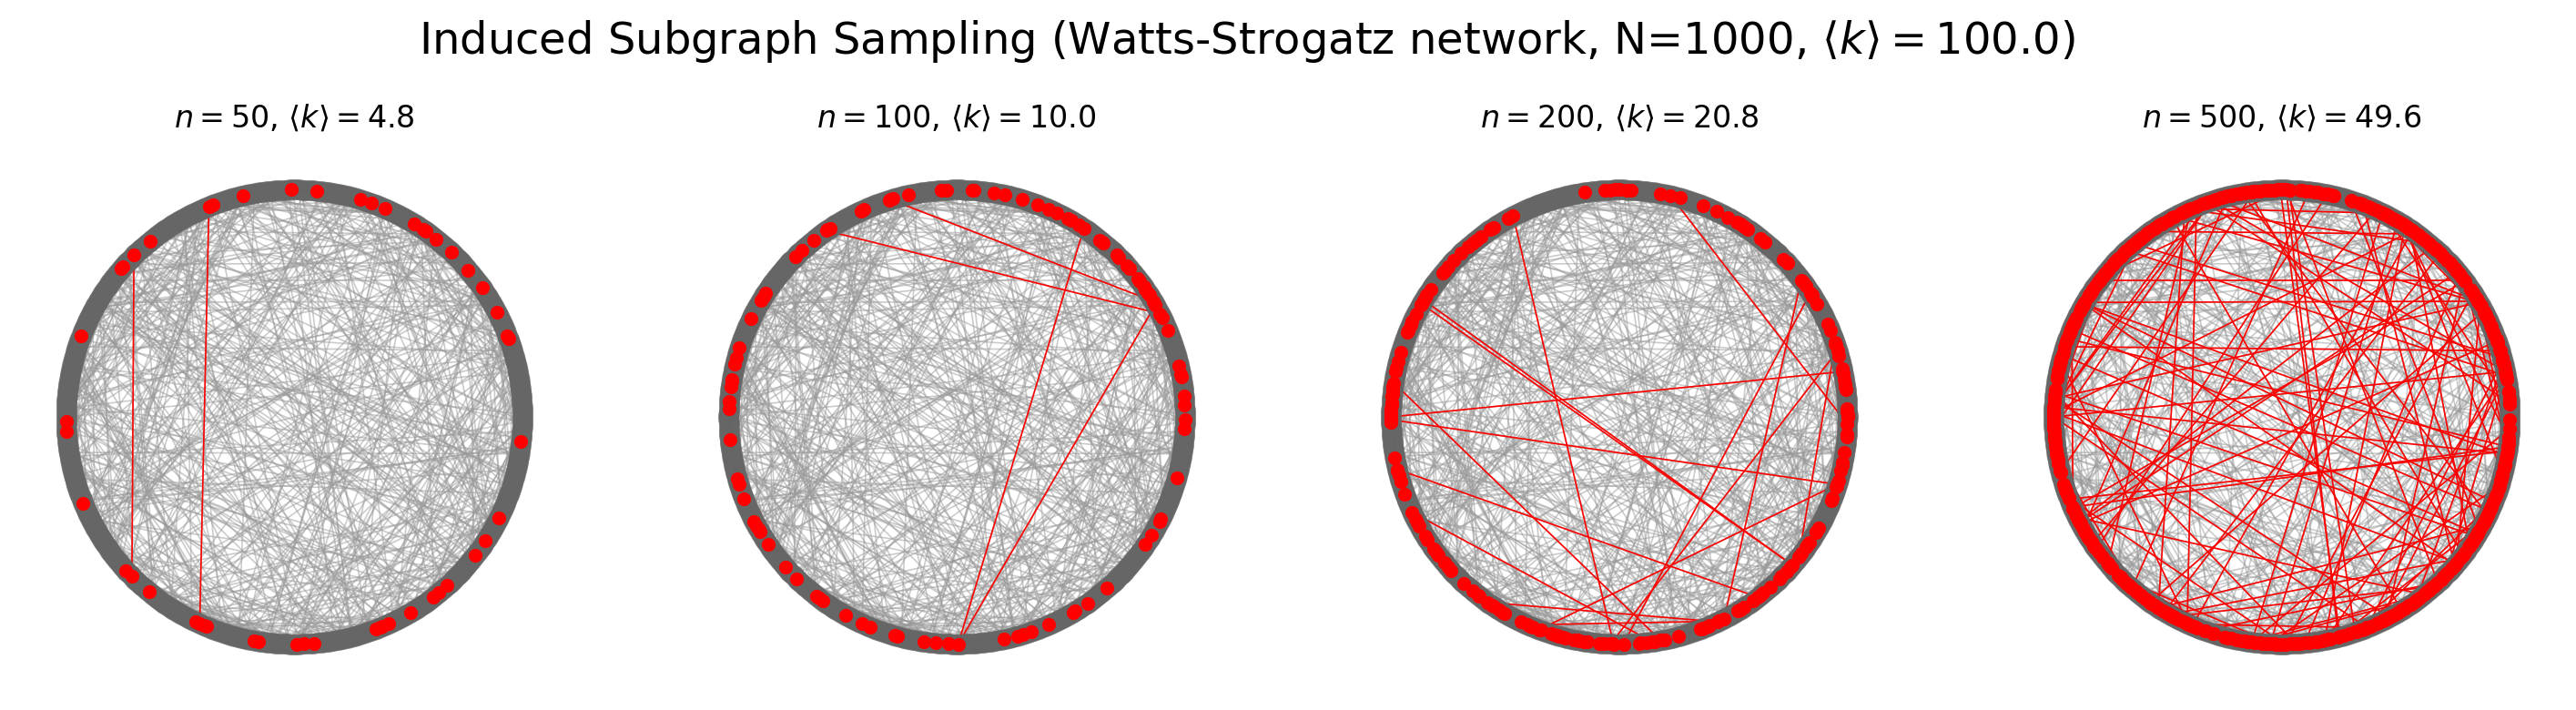

In [6]:
fig, ax = plt.subplots(1,4,figsize=(18,4),dpi=200)

for ni,n in enumerate([50,100,200,500]):
    subg = induced_subgraph_sampling(G_ws, n)
    nx.draw(G_ws, pos, node_color='.4', node_size=50, alpha=0.5, edge_color='.6', width=0.6, ax=ax[ni])
    nx.draw(subg, pos, node_color='red',node_size=20, edge_color='red', width=0.6, ax=ax[ni])
    ax[ni].set_title(r'$n = %i$, $\langle k \rangle = %.1f$'%(n, np.mean(list(dict(subg.degree).values()))))

plt.suptitle(r'Induced Subgraph Sampling (Watts-Strogatz network, N=%i, $\langle k \rangle = %.1f$)'%(
    G_ws.number_of_nodes(),average_degree),
             y=1.05, fontsize='xx-large')
plt.show()

### Estimate the average degree of the graph from the sampled graph

To estimate $M$ we can use the ***Horvitz-Thompson estimator***:
1. Our individual $i$ is the edge $e_{i,j}$ 
2. The total we want to estimate is: $$\tau = M =  \sum_i y_i = \sum_{e_{i,j}}1$$
3. In our case, the edge inclusion probability is: $$ \pi_{e_{i,j}} = \frac{n(n-1)}{N_v(N_v-1)} ,$$
4. Therefore we can estimate $\hat{M}$ as:$$ \hat{\tau}_\pi = \sum_{e_{i,j} \in S} \frac{1}{\pi_{e_{i,j}}} = M_s\frac{N_v(N_v-1)}{n(n-1)} .$$

Then, we can compute $\hat{k}$ as: $$\hat{k} = \frac{2\hat{M}}{N}.$$

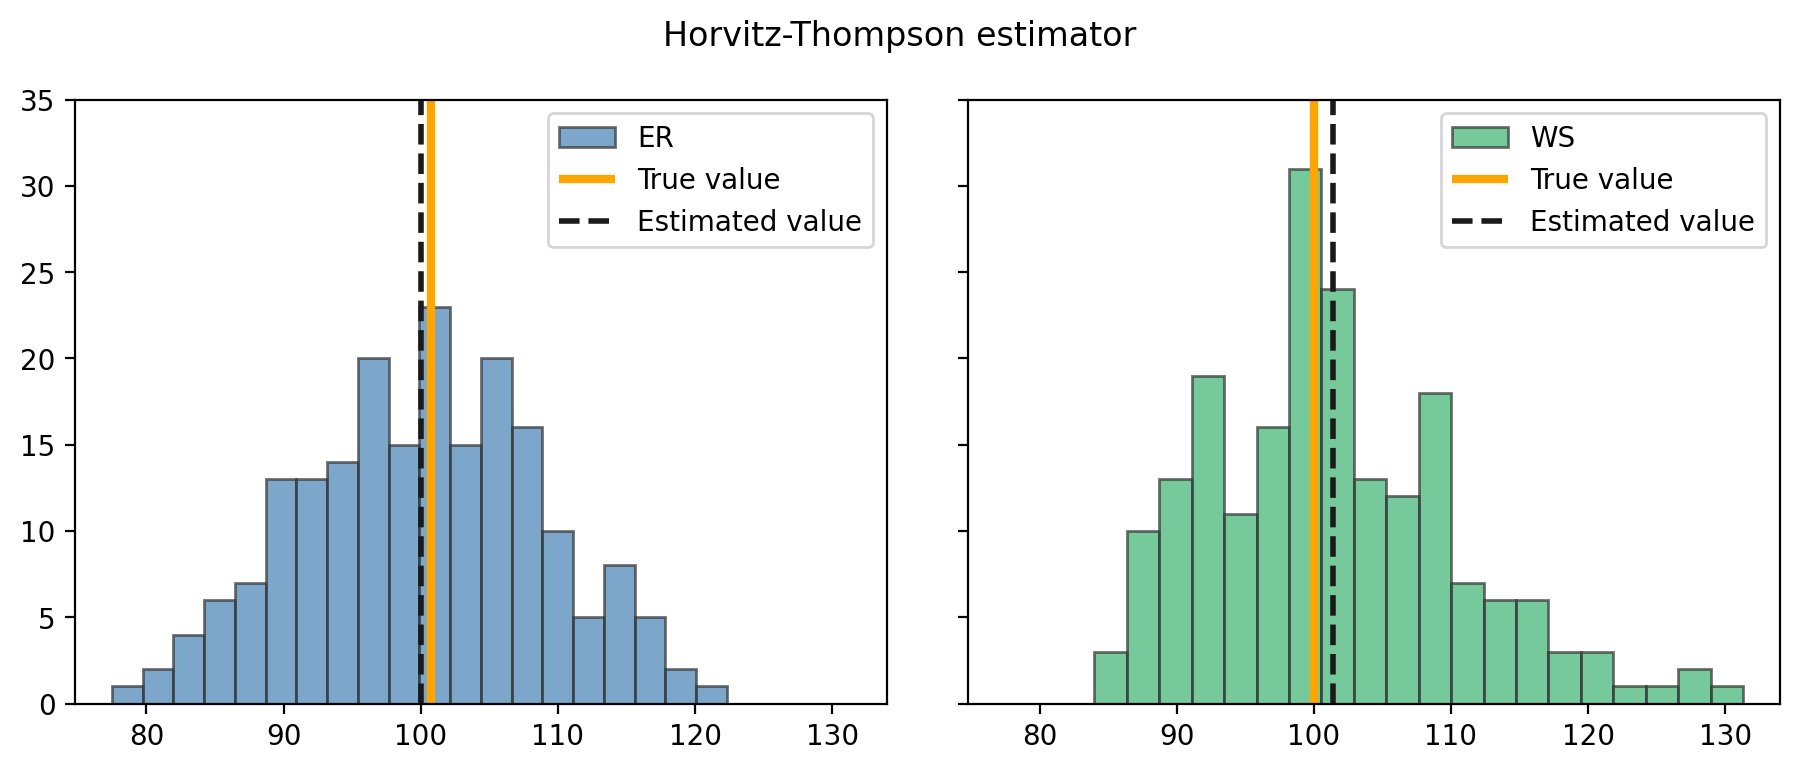

In [7]:
fig, ax = plt.subplots(1,2,figsize=(11,4),dpi=200,sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.1)
cols = ['steelblue','mediumseagreen']
    
B = 200 # number of simulations
labels = ['ER','WS']
for a, G in enumerate([G_er, G_ws]):
    av_degs = np.zeros(B)
    for b in range(B):
        n = 50
        subg_G = induced_subgraph_sampling(G, n)
        m = subg_G.number_of_edges()
        prob_e = n*(n-1)/N/(N-1)
        M_est = m/prob_e
        av_degs[b] = 2*M_est/N


    ax[a].hist(av_degs, 20, label=labels[a], color=cols[a], ec='.2', alpha=0.7)
    degs_G = np.mean(list(dict(G.degree()).values()))
    ax[a].vlines(degs_G, 0, 35, lw=3, label='True value', color='orange')

    mu = np.mean(av_degs)
    ax[a].vlines(mu, 0, 35, color='.1', lw=2, label='Estimated value', ls='--')
    ax[a].legend()
    ax[a].set_ylim(0,35)


plt.suptitle('Horvitz-Thompson estimator')

plt.show()

### Estimation of Group Size

To estimate the number of nodes of a graph from a sampled graph we can use the following ***capture-recapture*** estimator:
1. We sample two distinct graphs using the induced subgraph sampling design and we denote the number of nodes in the two graphs with $n_1$ and $n_2$, respectively;
2. We count the number of nodes that the two sampled graphs have in common (we denote this number with $n_c$);
3. We estimate the number of nodes in the original graph using the estimator
$ \hat{N_v} = \frac{n_1 n_2}{n_c}$.

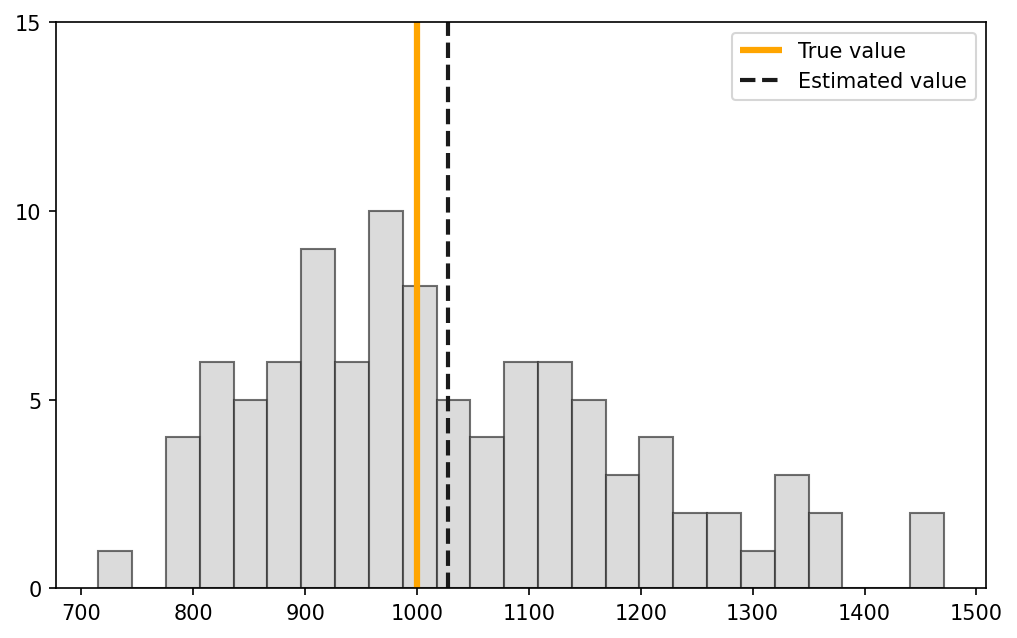

In [8]:
B = 100  # Number of iterations
N = 1000  # True size of the network

nodes = list(range(N))  

# Array to store network size estimates
N_est = np.zeros(B)

### Perform capture-recapture simulation
for b in range(B):
    # Randomly sample the size of the first and second sample sets
    n1 = np.random.randint(150, 200)
    n2 = np.random.randint(150, 200)
    
    # Randomly select nodes for the first and second samples
    V_s1 = np.random.choice(nodes, size=n1, replace=False)
    V_s2 = np.random.choice(nodes, size=n2, replace=False)
    
    # Count the number of nodes in the intersection (recaptured nodes)
    n_c = len(set(V_s1).intersection(V_s2))
    
    # Estimate the network size if recaptured nodes exist; otherwise, set to NaN
    N_est[b] = n1 * n2 / n_c if n_c > 0 else np.nan


# Filter out invalid estimates (NaN values)
N_est = N_est[np.isfinite(N_est)]

#################

fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=150)
ax.hist(N_est, bins=25, color='.8', edgecolor='.2', alpha=0.7)
ax.vlines(N, 0, 15, linewidth=3, label='True value', color='orange')

mu = np.mean(N_est)
ax.vlines(mu, 0, 15, color='.1', linewidth=2, label='Estimated value', linestyle='--')

ax.legend()
ax.set_yticks(range(0,25,5))
ax.set_ylim(0, 15)

plt.show()

_________
## Incident Subgraph Sampling
![](images/IncidentSubgraphSampling.png)

***Incident subgraph sampling*** consists in drawing at random $n$ edges from a graph of size $N_e$. In particular, let us denote with $G = (V,E)$ the original graph and with $G_s = (V_s,E_s)$ the sampled (sub)graph. Then, the set $E_s$ includes the $n$ edges randomly selected from $E$ and $V_s$ contains all the nodes incident to the selected edges such that $\forall e_{i,j} \in E_s$, $i,j \in V_s$.

In this case, the _vertex inclusion probability_ is equal to:
$$ \pi_i =   \begin{cases} 1 - \frac{\binom{N_e - k_i}{n}}{\binom{N_e}{n}}, \text{ if } n\leq N_e - k_i\\ 
1, \text{ if } n > N_e - k_i \end{cases} $$
while the _edge inclusion probability_ is equal to:
$$ \pi_{e_{i,j}} = \frac{n}{N_e} ,$$

$\forall i \in V$, and $\forall e_{i,j} \in E$.

Notice that $\pi_i$ is computed as one minus the probability of __not__ sampling an edge incident to $i$.

In [9]:
from random import shuffle

def incident_subgraph_sampling(G, n, is_directed=False):
    """
    Samples an incident subgraph containing `n` edges from the input graph `G`.
    
    Parameters
    ----------
    G : networkx.Graph or networkx.DiGraph
        The input graph from which the subgraph is sampled.
    n : int
        The number of edges to include in the sampled incident subgraph.
    is_directed : bool, optional (default=False)
        Specifies if the graph is directed. If True, edges are treated as directed.
        
    Returns
    -------
    subgraph : networkx.Graph or networkx.DiGraph
        The incident subgraph with `n` edges and the nodes connected by those edges.
        
    Raises
    ------
    ValueError
        If `n` is larger than the number of edges in the graph.
    """
    # Ensure `n` is not larger than the number of edges in G
    if n > G.number_of_edges():
        raise ValueError("`n` must be less than or equal to the number of edges in the graph.")
    
    # Get the list of edges in the graph
    edges = list(G.edges())
    
    # Shuffle the edges randomly to sample from them
    shuffle(edges)
    
    # Select the first `n` edges from the shuffled list
    sampled_edges = edges[:n]
    
    # Find the unique nodes connected by the sampled edges
    sampled_nodes = set(node for edge in sampled_edges for node in edge)
    
    # Create a new subgraph with the sampled nodes and edges
    subgraph = G.edge_subgraph(sampled_edges).copy()
    
    return subgraph

### Let's look at an example where we randomly assign nodes to group labels in a network

In [10]:
N = 1000
G = nx.barabasi_albert_graph(N,10)
pos = nx.spring_layout(G)
print("Average degree: %1.1f" % np.mean(list(dict(G.degree()).values())))
M = G.number_of_edges()
print("Number of edges:", M)

Average degree: 19.8
Number of edges: 9900


In [11]:
prob_red = 0.7
reds = 0
blues = 0
for node in G.nodes():
    G.nodes[node]['team'] = 'red' if np.random.rand() < prob_red else 'blue'
    if G.nodes[node]['team'] == 'red':
        reds += 1
    else:
        blues += 1
        
print("Number of red nodes:",reds)
print("Number of blue nodes:",blues)

Number of red nodes: 676
Number of blue nodes: 324


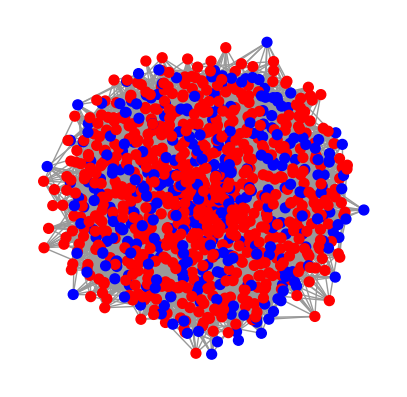

In [12]:
fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=100)
nx.draw(G, pos=pos, node_color=nx.get_node_attributes(G, 'team').values(),ax=ax,node_size=50, edge_color='.6')
plt.show()

In [13]:
from scipy.special import binom

def prob_i(N_e, k_i, n):
    """
    Calculate the probability of at least one sample overlapping with node i.

    Parameters:
    N_e : int
        Effective size of the network.
    k_i : int
        Number of samples that do not include node i.
    n : int
        Number of nodes in the sample.

    Returns:
    float
        Probability of at least one sample overlapping with node i.
    """
    # If the sample size exceeds the available nodes excluding k_i, 
    # the probability is 1 (certain inclusion).
    if n > N_e - k_i:
        return 1.0
    
    # Otherwise, calculate the complement of the probability that node i is not sampled.
    return 1.0 - binom(N_e - k_i, n) / binom(N_e, n)

In [14]:
# We use the Horovitz-Thompson estimator to get those numbers from sampled graphs
B = 1000
reds_est = [None]*B
blues_est = [None]*B
degrees = dict(G.degree())

for b in range(B):
    n = 100
    G_s = incident_subgraph_sampling(G,n)
    V_s = list(G_s.nodes())
    E_s = list(G_s.edges())
    pi = {node: prob_i(M,degrees[node],n)  for node in V_s}
    reds_est[b] = sum([ 1.0/pi[node] for node in V_s if G.nodes[node]['team'] == 'red'])
    blues_est[b] = sum([ 1.0/pi[node] for node in V_s if G.nodes[node]['team'] == 'blue'])

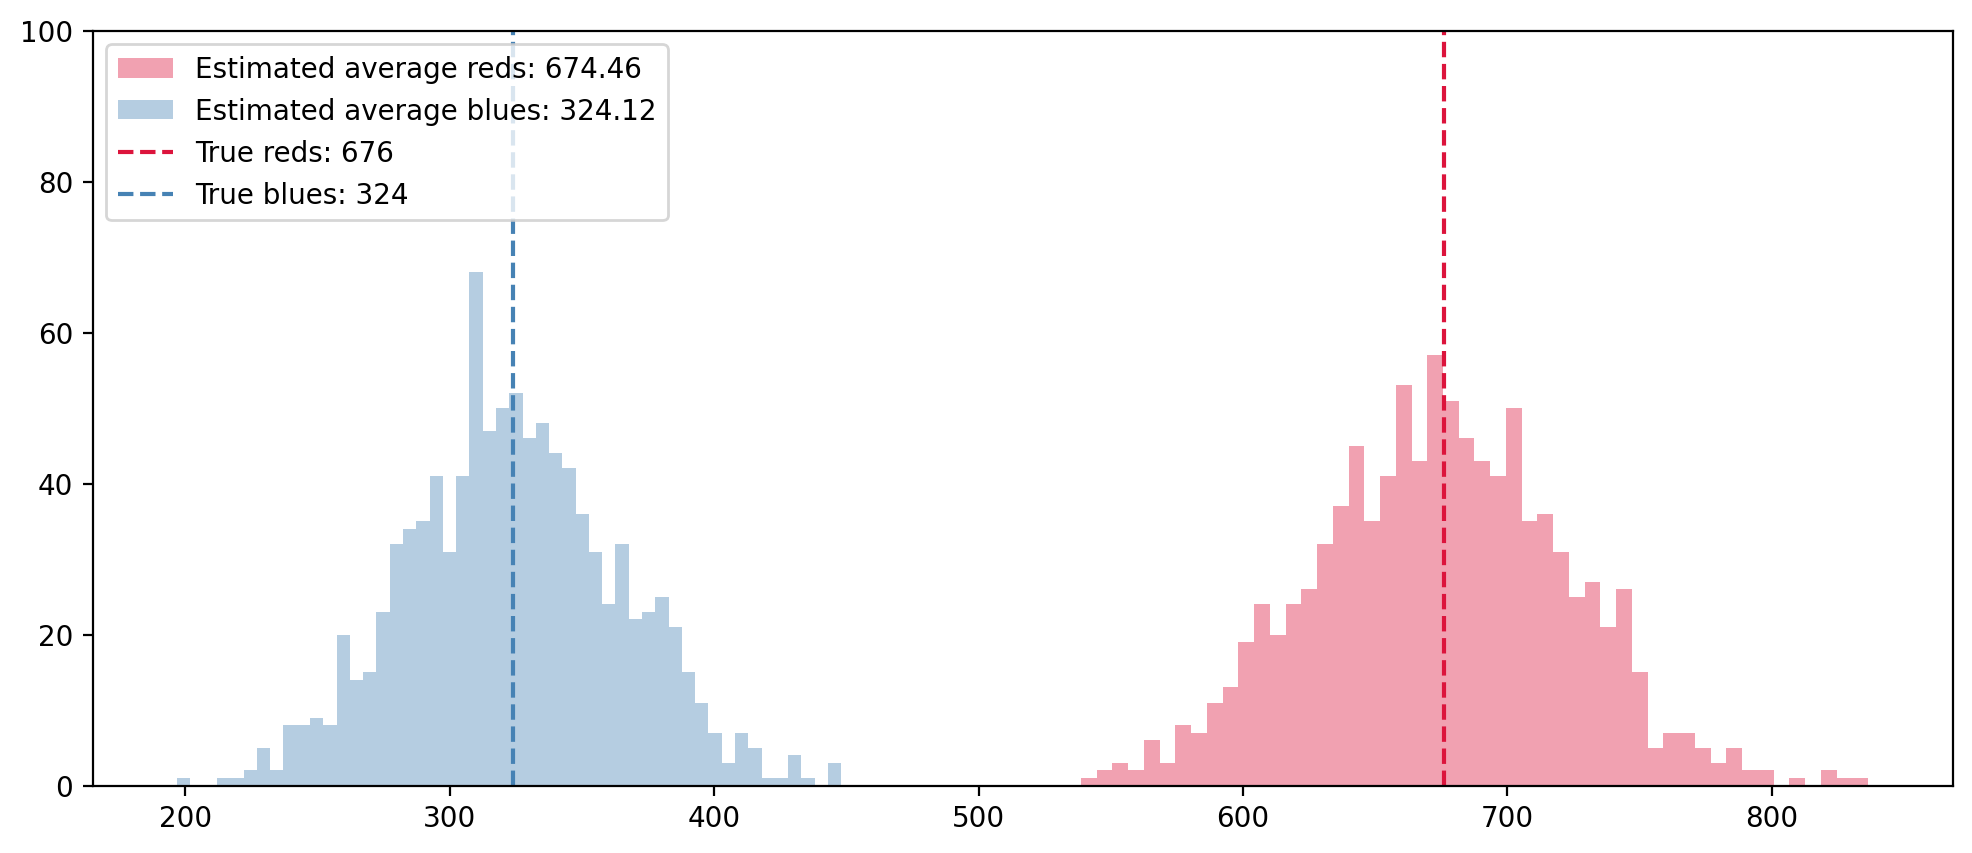

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12,5),dpi=200)

ax.hist(reds_est, bins=50, color='crimson', alpha=0.4, label='Estimated average reds: %.2f'%(np.mean(reds_est)))
ax.hist(blues_est, bins=50, color='steelblue', alpha=0.4, label='Estimated average blues: %.2f'%(np.mean(blues_est)))

ax.vlines(reds, 0, 100, color='crimson', ls='--', label='True reds: %i'%reds)
ax.vlines(blues, 0, 100, color='steelblue', ls='--', label='True blues: %i'%blues)

ax.legend(loc=2)
ax.set_ylim(0,100)

plt.show()

In [16]:
def get_binning(data, num_bins=50, is_pmf=False, log_binning=False, threshold=0):
    """
    Bins the input data and calculates the probability mass function (PMF) or 
    probability density function (PDF) over the bins. Supports both linear and 
    logarithmic binning.

    Parameters
    ----------
    data : array-like
        The data to be binned, typically a list or numpy array of values.
    num_bins : int, optional
        The number of bins to use for binning the data (default is 15).
    is_pmf : bool, optional
        If True, computes the probability mass function (PMF) by normalizing 
        histogram counts to sum to 1. If False, computes the probability density 
        function (PDF) by normalizing the density of the bins (default is True).
    log_binning : bool, optional
        If True, uses logarithmic binning with log-spaced bins. If False, uses 
        linear binning (default is False).
    threshold : float, optional
        Only values greater than `threshold` will be included in the binning, 
        allowing for the removal of isolated nodes or outliers (default is 0).
    
    Returns
    -------
    x : numpy.ndarray
        The bin centers, adjusted to be the midpoint of each bin.
    p : numpy.ndarray
        The computed PMF or PDF values for each bin.
    
    Notes
    -----
    This function removes values below a specified threshold, then defines 
    bin edges based on the specified binning method (linear or logarithmic). 
    It calculates either the PMF or PDF based on `is_pmf`.
    """
    
    # Filter out isolated nodes or low values by removing data below threshold
    values = list(filter(lambda x: x > threshold, data))
    if len(values) != len(data):
        print("%s isolated nodes have been removed" % (len(data) - len(values)))

    # Define the range for binning (support of the distribution)
    lower_bound = min(values)
    upper_bound = max(values)

    # Define bin edges based on binning type (logarithmic or linear)
    if log_binning:
        # Use log-spaced bins by taking the log of the bounds
        lower_bound = np.log10(lower_bound)
        upper_bound = np.log10(upper_bound)
        bin_edges = np.logspace(lower_bound, upper_bound, num_bins + 1, base=10)
    else:
        # Use linearly spaced bins
        bin_edges = np.linspace(lower_bound, upper_bound, num_bins + 1)

    # Calculate histogram based on chosen binning method
    if is_pmf:
        # Calculate PMF: normalized counts of data in each bin
        y, _ = np.histogram(values, bins=bin_edges, density=False)
        p = y / y.sum()  # Normalize to get probabilities
    else:
        # Calculate PDF: normalized density of data in each bin
        p, _ = np.histogram(values, bins=bin_edges, density=True)

    # Compute bin centers (midpoints) to represent each bin
    x = bin_edges[1:] - np.diff(bin_edges) / 2  # Bin centers for plotting

    # Remove bins with zero probability to avoid plotting/display issues
    x = x[p > 0]
    p = p[p > 0]

    return x, p

In [17]:
M = 50000
N = 10000
G = nx.gnm_random_graph(N,M)
degrees = list(dict(G.degree()).values())
print("Average degree: %1.3f" % np.mean(degrees))
n = 5000

Average degree: 10.000


In [18]:
# Using Incident Graph Sampling
G_incid = incident_subgraph_sampling(G, n)
degrees_incid = list(dict(G_incid.degree()).values())
x_incid,y_incid = get_binning(degrees_incid, log_binning=True)

In [19]:
# True Degree distribution
x_true,y_true = get_binning(degrees, log_binning=True)

1 isolated nodes have been removed


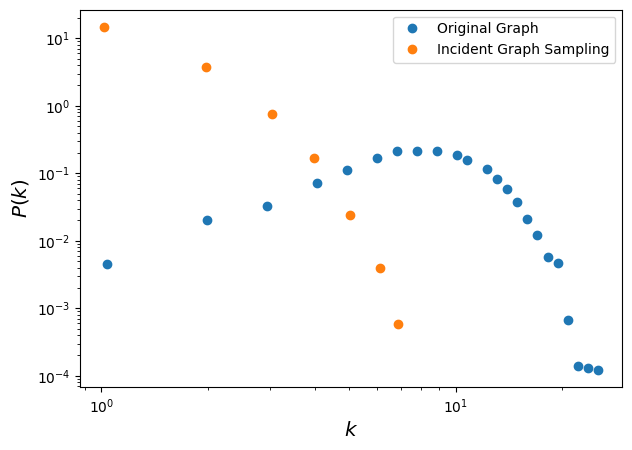

In [20]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
ax.loglog(x_true,y_true,'o', label='Original Graph')
ax.loglog(x_incid, y_incid, 'o', label='Incident Graph Sampling')
ax.legend()
ax.set_xlabel(r'$k$',fontsize='x-large')
ax.set_ylabel(r'$P(k)$',fontsize='x-large')

plt.show()

__________
## Edge Sampling with Graph Induction (ES-i)
![](images/ES-i.png)

***Edge Sampling with Graph Induction*** consists in drawing at random $n$ edges from a graph of size $N_e$. In partiuclar, let us denote with $G = (V,E)$ the original graph and with $G_s = (V_s,E_s)$ the sampled (sub)graph. Then, $V_s$ contains all the nodes incident to the randomly selected edges and $E_s$ comprises the $n$ edges randomly selected from $E$ plus all the other edges $e_{i,j} \in E$ such that that both $i$ and $j$ belong to $V_s$. 

Some observations: 

1. Edge sampling is inherently biased towards selection of nodes with higher degrees resulting in an upward bias in the degree distributions of sampled nodes compared to nodes in the original graph
2. In sampled subgraphs degrees are naturally underestimated since only a fraction of neighbors may be selected. This results in a downward bias, regardless of the actual sampling algorithm used. 
3. The upward bias of edge sampling can help offset this downward bias to some extent, it alone is not sufficient to fully offset the bias. 
4. Then, a simple graph induction step over the edge-sampled node set (where we sample all the edges between any sampled nodes in the graph) can recover much of the connectivity around the high degree nodes offsetting the downward degree bias as well as improving local clustering in the sampled graph.

In [21]:
def edge_sampling_with_induction(G, n):
    """
    Perform edge sampling with induction and return a new graph.

    Parameters:
    G : networkx.Graph
        Input graph.
    n : int
        Number of edges to sample initially.

    Returns:
    networkx.Graph
        A new graph induced by the sampled nodes and edges.
    """
    # Get all edges and total number of edges in the graph
    edges = list(G.edges())
    M = G.number_of_edges()
    
    # Sample n edges randomly without replacement
    sampled_edges = set([edges[i] for i in np.random.permutation(M)[:n]])
    
    # Extract the set of nodes in the sampled edges
    nodes_from_sampled_edges = set(node for edge in sampled_edges for node in edge)
    
    # Induce edges between the sampled nodes
    induced_edges = set(sampled_edges)
    for node_i, node_j in edges:
        if node_i in nodes_from_sampled_edges and node_j in nodes_from_sampled_edges:
            induced_edges.add((node_i, node_j))
    
    # Create a new graph with the sampled nodes and induced edges
    new_graph = nx.Graph()
    new_graph.add_nodes_from(nodes_from_sampled_edges)
    new_graph.add_edges_from(induced_edges)
    
    return new_graph

In [22]:
G_esi = edge_sampling_with_induction(G, n)
degrees_esi = list(dict(G_esi.degree()).values())
x_esi,y_esi = get_binning(degrees_esi, log_binning=True)

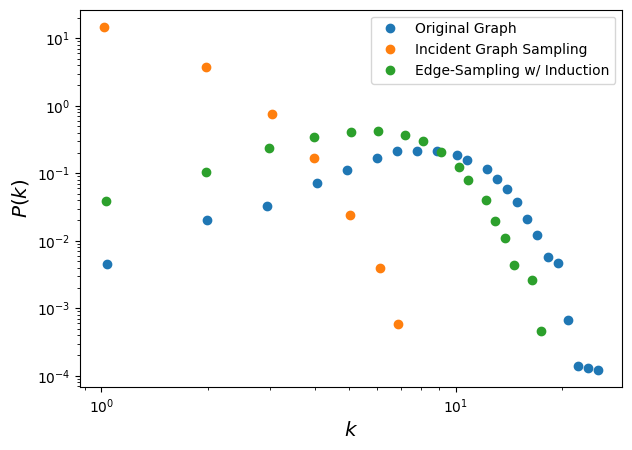

In [23]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
ax.loglog(x_true, y_true, 'o', label='Original Graph')
ax.loglog(x_incid, y_incid, 'o', label='Incident Graph Sampling')
ax.loglog(x_esi, y_esi, 'o', label='Edge-Sampling w/ Induction')
ax.legend()
ax.set_xlabel(r'$k$',fontsize='x-large')
ax.set_ylabel(r'$P(k)$',fontsize='x-large')


plt.show()

_________

### Why is this working better?

Standard edge sampling (i.e. incident subgraph sampling) is ___biased___ towards selection of high degree nodes. Therefore, the sampled degree distribution is ___upward biased___ with respect to the original graph. 
However, in all sampled subgraphs, degrees are actually underestimated because only a fraction of neighbors may be selected.

As a consequence, there is a ___downward bias___, regardless of the actual sampling algorithm used. 
Incident subgraph sampling alone is not enough to correct for this downward bias since it samples each edge independently and it is therefore unlikely to preserve local nodes connectivity.

By adding the additional ___graph induction___ step, not only local clustering is improved, but it is also easier to reconstruct the connectivity of (high degree) nodes.

In [24]:
from scipy.stats import ks_2samp

def ks_d(values1, values2):
    """
    Compute the Kolmogorov-Smirnov (KS) statistic to compare two distributions.

    Parameters:
    values1 : array-like
        First sample of values.
    values2 : array-like
        Second sample of values.

    Returns:
    float
        KS statistic (D), representing the maximum distance between the empirical 
        cumulative distribution functions (ECDFs) of the two samples.
    """
    D, _ = ks_2samp(values1, values2)
    return D

In [25]:
print('Original vs ES-i:', ks_d(degrees, degrees_esi))
print('Original vs Incident Graph Sampling:', ks_d(degrees, degrees_incid))

Original vs ES-i: 0.36773245349022105
Original vs Incident Graph Sampling: 0.9656759798520385


____________
## Snowball Sampling
![](images/SnowballSampling.png)

***Snowball sampling*** extends the labeled star sampling procedure. In particular, it consists in drawing at random $n$ nodes from a graph of order $N_v$. Let us denote this initial set of nodes with $V_{s,0}$ and with $\mathbb{V}(S)$ the set of all neighbors of the vertices in the a given set $S$. Then, a $k$-wave snowball sampling algorithm simply extends the initial set of nodes $V_{s,0}$ $k$ times in the following way:
* $V_{s,1} = \mathbb{V}(V_{s,0}) \cap \bar{V}_{s,0}$, 
* $V_{s,2} = \mathbb{V}(V_{s,1}) \cap \bar{V}_{s,1} \cap \bar{V}_{s,0}$, 
* ...
* $V_{s,k} = \mathbb{V}(V_{s,k-1}) \cap \bar{V}_{s,k-1} \cap \dots \cap \bar{V}_{s,0}$. 

1. When the degree distribution of the original network is power-law, it is found that the estimated degree exponent decreases with snowball sampling as we decrease the sampling fraction. 
2. Sampled networks are shown to be more disassortative than the original networks. This pattern is common no matter whether the original network is assortative, disassortative, or neutral.

In [26]:
def snowball_sampling(G, seed_nodes, n_waves=2):
    """
    Perform snowball sampling on a graph.

    Parameters:
    G : networkx.Graph or networkx.DiGraph
        Input graph.
    seed_nodes : list or set
        Initial set of nodes to start the snowball sampling.
    n_waves : int, optional
        Number of waves to expand the snowball sampling (default is 2).

    Returns:
    networkx.Graph or networkx.DiGraph
        A new graph G_s containing the sampled nodes and edges.
    """
    # Initialize sets to keep track of sampled nodes and edges
    V_s = set(seed_nodes)
    E_s = set()
    
    # Initialize the wave structure
    V = [set()] * (n_waves + 1)
    V[0] = set(seed_nodes)
    
    # Perform snowball sampling over the specified number of waves
    for k in range(n_waves):
        V[k + 1] = set()  # Initialize the next wave
        for node_i in V[k]:
            for node_j in G.neighbors(node_i):
                # Add the edge to the sampled edge set
                edge = (node_i, node_j) if not G.is_directed() and node_i < node_j else (node_i, node_j)
                E_s.add(edge)
                
                # Add the neighboring node to the next wave
                V[k + 1].add(node_j)
        
        # Exclude nodes already in the sampled set
        V[k + 1] -= V_s
        
        # Add new nodes to the sampled set
        V_s.update(V[k + 1])
    
    # Create the new sampled graph
    G_s = G.subgraph(V_s).copy()
    return G_s


In [27]:
N = 15000
m = 3
G = nx.barabasi_albert_graph(N, m)
M = G.number_of_nodes()
degrees = list(dict(G.degree()).values())
print(M)

15000


Number of waves: 0 | Number of nodes discovered: 50 | Number of edges discovered: 1
Number of waves: 1 | Number of nodes discovered: 300 | Number of edges discovered: 344
Number of waves: 2 | Number of nodes discovered: 3464 | Number of edges discovered: 7339
Number of waves: 3 | Number of nodes discovered: 13823 | Number of edges discovered: 40935
Number of waves: 4 | Number of nodes discovered: 15000 | Number of edges discovered: 44991
Number of waves: 5 | Number of nodes discovered: 15000 | Number of edges discovered: 44991


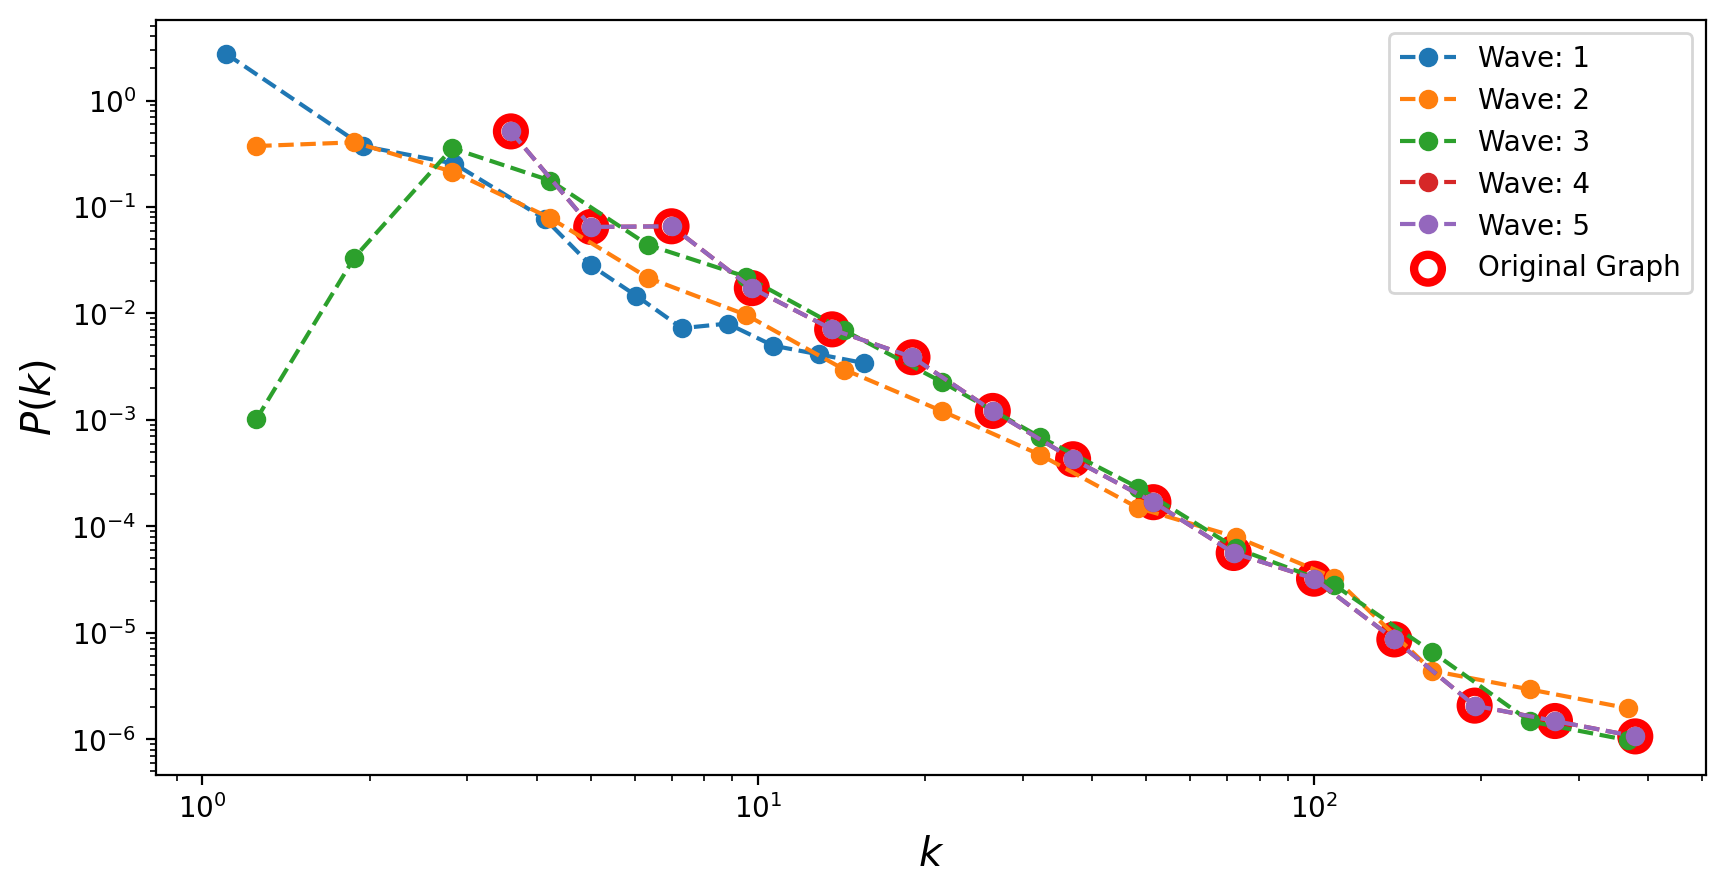

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10, 5), dpi=200)

n = 50  # Number of seed nodes
n_waves = 5  # Maximum number of waves
degrees_sampled = [None] * (n_waves + 1)

nodes = list(G.nodes())

# Perform snowball sampling for increasing numbers of waves
for k in range(n_waves + 1):
    # Select seed nodes randomly
    seed_nodes = set(np.random.choice(nodes, size=n, replace=False))
    
    # Perform snowball sampling
    G_s = snowball_sampling(G, seed_nodes, n_waves=k)
    
    # Print summary of the sampled graph
    print(f"Number of waves: {k} | Number of nodes discovered: {G_s.number_of_nodes()} | "
          f"Number of edges discovered: {G_s.number_of_edges()}")
    
    # Get degree distribution of the sampled graph
    degrees_sampled[k] = [deg for _, deg in G_s.degree()]
    
    # Plot degree distribution for the current wave
    if k > 0:
        x1, y1 = get_binning(degrees_sampled[k], log_binning=True, num_bins=15, is_pmf=False)
        ax.loglog(x1, y1, '--o', label=f'Wave: {k}')

# Plot the degree distribution of the original graph
x, y = get_binning(degrees, log_binning=True, num_bins=15, is_pmf=False)
ax.scatter(x, y, s=100, facecolors='none', edgecolors='r', lw=3, label='Original Graph')

ax.legend()
ax.set_xlabel(r'$k$',fontsize='x-large')
ax.set_ylabel(r'$P(k)$',fontsize='x-large')


plt.show()

_____________
## Traceroute Sampling
![](images/TracerouteSampling.png)

***Traceroute sampling*** is an example of a _link tracing_ algorithm used to generate sampled graphs. In traceroute sampling, two initial disjoint sets of nodes are drawn at random: a set of _sources_ $V_S$ of cardinality $n_S$ and a set of _targets_ $V_T$ of cardinality $n_T$. Then, a route is traced from each node in $V_S$ to each node in $V_T$ and all vertices and edges encountered are added to $V_s$ and $E_s$, respectively.  Then, the sampled graph is $G_s = (V_s,E_s)$.



If the source and target sets are obtained using a simple random sampling without replacement and the route considered is simply the shortest path between each pair of vertices, then the _vertex inclusion probability_ can be approximated with:
$$ \pi_i \approx 1 - \left(1 - \frac{n_S}{N_v} - \frac{n_T}{N_v}\right)\exp\left(-b_i\frac{n_S}{N_v}\frac{n_T}{N_v}\right)  ;$$
while the _edge inclusion probability_ can be approximated with:
$$ \pi_{e_{i,j}} \approx 1 - \exp\left(-b_{e_{i,j}}\frac{n_S}{N_v}\frac{n_T}{N_v}\right) ;$$
where $b_i$ is the betweenness centrality of vertex $i$ and $b_{e_{i,j}}$ is the betweenness centrality of edge $e_{i,j}$. 

1. Traceroute sampling can make power laws appear where none existed in the underlying graph (even in the extreme case of regular random graphs)
2. Even when the original degree distribution is power-law, traceroute sampling significantly underestimate the tail exponent

In [29]:
# def traceroute_sampling(G,n_sources=5,n_targets=50):
#     nodes = G.nodes()
#     shuffle(nodes)
    
#     sources = set(nodes[:n_sources])
#     targets = set(nodes[n_sources:(n_sources+n_targets)])
    
#     paths = [nx.shortest_path(G, source=source_node, target=target_node) 
#              for source_node in sources for target_node in targets]
    
#     V_s = set()
#     E_s = set()
    
#     for path in paths:
#         V_s.add(path[0])
#         for i in xrange(1,len(path)):
#             V_s.add(path[i])
#             E_s.add((path[i-1],path[i]))
    
#     return (V_s, list(E_s))

def traceroute_sampling(G, n_sources=5, n_targets=50):
    """
    Perform traceroute sampling on a graph, selecting multiple sources and targets.

    Parameters:
    G : networkx.Graph
        Input graph.
    n_sources : int, optional
        Number of source nodes (default is 5).
    n_targets : int, optional
        Number of target nodes (default is 50).

    Returns:
    networkx.Graph
        A new graph containing the sampled nodes and edges.
    """
    nodes = list(G.nodes())
    shuffle(nodes)

    # Select sources and targets
    sources = set(nodes[:n_sources])
    targets = set(nodes[n_sources:n_sources + n_targets])

    # Initialize the sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()

    # Compute shortest paths from each source to each target
    for source_node in sources:
        for target_node in targets:
            try:
                path = nx.shortest_path(G, source=source_node, target=target_node)
                G_s.add_nodes_from(path)
                G_s.add_edges_from((path[i], path[i + 1]) for i in range(len(path) - 1))
            except nx.NetworkXNoPath:
                pass  # Ignore if no path exists

    return G_s

### Bias reduction in Traceroute Sampling

We can use the _capture-recapture_ estimator to improve the sampled degree distribution (see Flaxman, A. D., & Vera, J., 2007).


Let us denote with $U$ the set of sources we are using to perform the traceroute sampling and with $G_{u_1}$ and $G_{u_2}$ two sampled graphs obtained using source nodes $u_1$ and $u_2$, respectively. Then, we can estimate the degree of a generic node $i$ in the sampled graph $G_{u_1}$ as:

$$ \hat{k}(i)_{u_1,u_2} = \begin{cases} \frac{|V_{u_1}(i)|\times |V_{u_2}(i)|}{|V_{u_1}(i)\cap V_{u_2}(i)|}, & \mbox{if } \left|V_{u_1}(i)\cap V_{u_2}(i)\right|>2 \\ 
\infty, & \mbox{otherwise. } \end{cases} $$

Then, we can repeat the same procedure for all the pairs of sources in $U$ and obtain the final estimate for the degree of node $i$ as:

$$ \hat{k}(i) = median \left( \left\{ \hat{k}(i)_{u_i,u_j} \neq \infty  \right\} \right) .$$

In [30]:
def traceroute_sampling_revised(G, source_node, n_targets=50):
    """
    Perform traceroute sampling from a single source to multiple targets.

    Parameters:
    G : networkx.Graph
        Input graph.
    source_node : node
        Source node to start the traceroute.
    n_targets : int, optional
        Number of target nodes (default is 50).

    Returns:
    networkx.Graph
        A new graph containing the sampled nodes and edges.
    """
    nodes = list(G.nodes())

    # Remove the source node from the list of potential targets
    nodes.remove(source_node)
    shuffle(nodes)

    # Select targets
    targets = set(nodes[:n_targets])

    # Initialize the sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()

    # Compute shortest paths from the source to each target
    for target_node in targets:
        try:
            path = nx.shortest_path(G, source=source_node, target=target_node)
            G_s.add_nodes_from(path)
            G_s.add_edges_from((path[i], path[i + 1]) for i in range(len(path) - 1))
        except nx.NetworkXNoPath:
            pass  # Ignore if no path exists

    return G_s

In [31]:
# Graph parameters
N = 1000
k = 15.0
M = int(0.5 * N * k)
G = nx.gnm_random_graph(N, M)
degrees = [deg for _, deg in G.degree()]  # Original degree distribution

# Traceroute sampling parameters
n_sources = 8
share_nodes = []
share_edges = []
sampled_degrees = []
sampled_clustering = []
N_targets = np.arange(50, 261, 50)

# Perform traceroute sampling for different numbers of targets
for n_targets in N_targets:
    sampled_graph = traceroute_sampling(G, n_sources, n_targets)  # Updated function returns the graph directly

    # Compute metrics
    share_nodes.append(sampled_graph.number_of_nodes() / float(N))
    share_edges.append(sampled_graph.number_of_edges() / float(M))
    sampled_degrees.append([deg for _, deg in sampled_graph.degree()])
    sampled_clustering.append(list(nx.clustering(sampled_graph).values()))


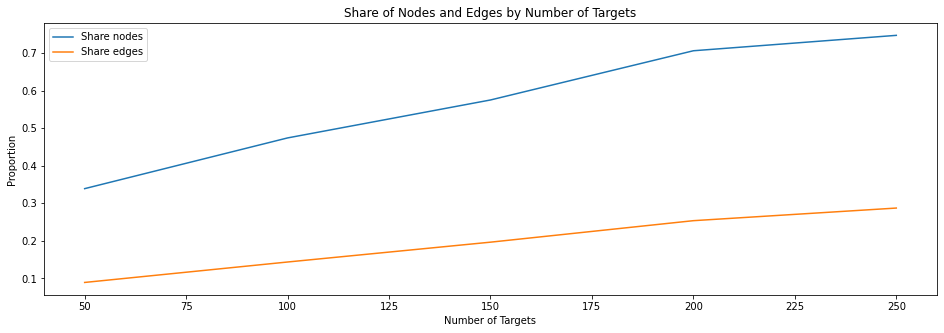

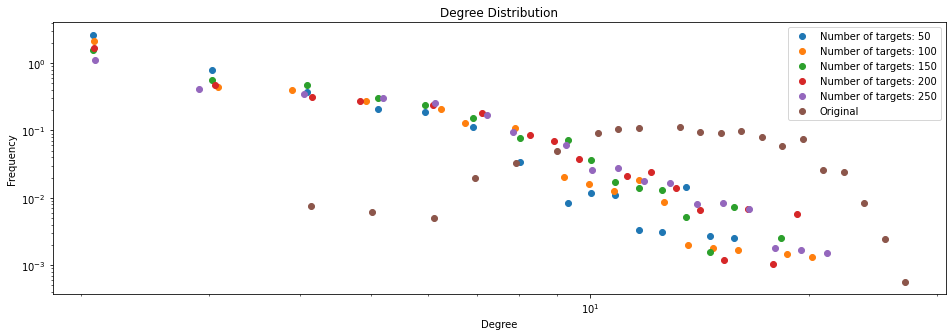

In [32]:
# Plot share of nodes and edges
plt.figure(figsize=(16, 5))
plt.plot(N_targets, share_nodes, label='Share nodes')
plt.plot(N_targets, share_edges, label='Share edges')
plt.xlabel("Number of Targets")
plt.ylabel("Proportion")
plt.legend()
plt.title("Share of Nodes and Edges by Number of Targets")
plt.show()

# Plot degree distributions
plt.figure(figsize=(16, 5))
for k, values in enumerate(sampled_degrees):
    x, y = get_binning(values, log_binning=True, num_bins=30)
    plt.loglog(x, y, 'o', label=f"Number of targets: {N_targets[k]}")

# Plot original degree distribution
x, y = get_binning(degrees, log_binning=True, num_bins=30)
plt.loglog(x, y, 'o', label="Original")

plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.title("Degree Distribution")
plt.show()

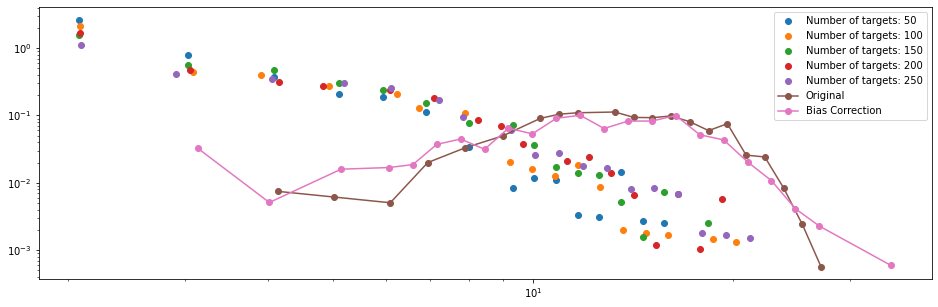

In [33]:
from collections import defaultdict
from itertools import combinations

# Parameters
n_sources = 8
n_targets = 100
B = 200
degree = defaultdict(list)

# Run sampling iterations
for b in range(B):
#     print(f"Iteration {b + 1}/{B}")

    # Shuffle and select source nodes
    nodes = list(G.nodes())
    np.random.shuffle(nodes)
    source_nodes = nodes[:n_sources]

    # Perform traceroute sampling for each source node
    sampled_graphs = [traceroute_sampling_revised(G, source_node, n_targets) for source_node in source_nodes]

    # Generate all pairs of sampled graphs
    pairs = combinations(sampled_graphs, 2)

    for sampled_graph1, sampled_graph2 in pairs:
        for u in sampled_graph1.nodes:
            # Get neighbors in both sampled graphs
            neigh1 = set(sampled_graph1.neighbors(u))
            if u in sampled_graph2:
                neigh2 = set(sampled_graph2.neighbors(u))
                # Compute the degree estimation based on shared neighbors
                N_c = float(len(neigh1.intersection(neigh2)))
                if N_c > 2:
                    degree[u].append(len(neigh1) * len(neigh2) / N_c)

# Compute degree estimates
degree_est = [np.median(values) for values in degree.values()]

# Plotting
plt.figure(figsize=(16, 5))

for k, values in enumerate(sampled_degrees):
    x,y = get_binning(values, log_binning=True, num_bins=30)
    __ = plt.loglog(x,y, 'o', label = "Number of targets: %d" % N_targets[k])

# Original degree distribution
x, y = get_binning(degrees, log_binning=True, num_bins=30)
plt.loglog(x, y, '-o', label="Original")

# Bias-corrected degree estimates
x, y = get_binning(degree_est, log_binning=True, num_bins=30)
plt.loglog(x, y, '-o', label="Bias Correction")

plt.legend()
plt.show()

_________

## Random Walk Sampling

___Random Walk sampling___ is another example of a _link tracing_ algorithm used to generate sampled graphs. 
The classic algorithm works as follows:
1. we start from a random vertex $i_0$;
2. at each $t_{th}$ step of the walk, given that we are at node $i_t$, we move to one of $i_t$ neighbors with equal probability (i.e. if $k_{i_t}$ is the degree of node $i_t$, we pick one of its neighbors wiht probability $1/k_{i_t}$).

Then, $V_s$ will include all the nodes visited during the random walk, while $E_s$ will include all the edges traversed. 

It can be shown that the probability of being at a particular node $i$ converges to the stationary distribution:
$$ \pi_i = \frac{k_i}{2M}.$$


However, in practice, we may allow for the fact that the graph is not connected and that our random walker might get stucked. If that is the case, we can randomly select a different starting node for the remaining steps. Lastly, we can allow for the possibility that the random walker "flies back" to the original node and re-starts walking from there.



In [34]:
def random_walk_sampling(G, n, n0=10, fly_back=0.15, jump_after=10):
    """
    Perform random walk sampling on a graph.

    Parameters:
    G : networkx.Graph
        Input graph.
    n : int
        Target number of nodes to sample.
    n0 : int, optional
        Number of initial walkers (default is 10).
    fly_back : float, optional
        Probability of flying back to the starting node (default is 0.15).
    jump_after : int, optional
        Number of consecutive steps stuck before restarting (default is 10).

    Returns:
    networkx.Graph
        A new graph G_s containing the sampled nodes and edges.
    """
    # Initialize sampled nodes and edges
    nodes = list(G.nodes())
    shuffle(nodes)
    V0 = nodes[:n0]  # Initial walker positions
    V_s = set(V0)
    E_s = set()
    
    # State variables for each walker
    current_position = V0[:]
    prev_position = [-1] * n0
    stuck = [0] * n0

    for k in range(n0):
        while len(V_s) < n:
            # Check if walker is stuck
            if current_position[k] == prev_position[k]:
                stuck[k] += 1
            if stuck[k] > jump_after:
                shuffle(nodes)
                current_position[k] = nodes[0]
                stuck[k] = 0

            # Select a random neighbor for the next step
            neighbors = list(G.neighbors(current_position[k]))
            if not neighbors:  # Handle isolated nodes
                continue
            shuffle(neighbors)
            
            # Update positions
            prev_position[k] = current_position[k]
            current_position[k] = neighbors[0]

            # Add the new node and edge to the sampled set
            V_s.add(current_position[k])
            edge = (current_position[k], prev_position[k]) if current_position[k] > prev_position[k] \
                else (prev_position[k], current_position[k])
            E_s.add(edge)

            # Fly back to the starting node with a given probability
            if np.random.rand() <= fly_back:
                current_position[k] = V0[k]

    # Create the new sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()
    G_s.add_nodes_from(V_s)
    G_s.add_edges_from(E_s)

    return G_s


In [35]:
N = 10000
G = nx.barabasi_albert_graph(N,5)
M = G.number_of_edges()
degrees = list(dict(G.degree()).values())
clustering = list(nx.clustering(G).values())

9 isolated nodes have been removed
9 isolated nodes have been removed
9 isolated nodes have been removed
9 isolated nodes have been removed
9 isolated nodes have been removed


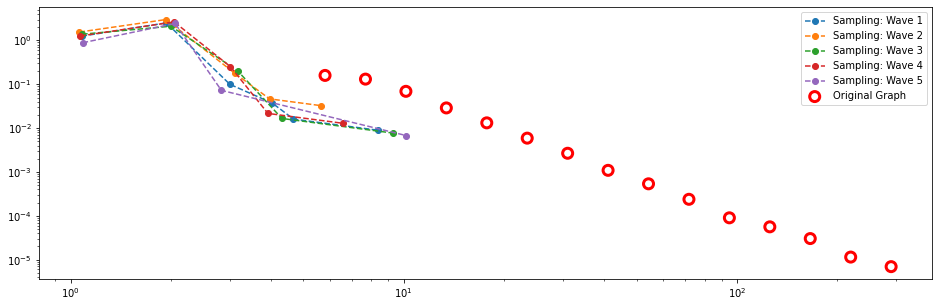

In [36]:
plt.figure(figsize=(16, 5))
n = 100  # Target sample size
n0 = 10  # Number of walkers
fly_back = 0.15
jump_after = 10

degrees_sampled = []

for k in range(1, 6):  # Number of waves or attempts
    G_s = random_walk_sampling(G, n=n, n0=n0, fly_back=fly_back, jump_after=jump_after)
    degrees_sampled.append([deg for _, deg in G_s.degree()])
    x, y = get_binning(degrees_sampled[-1], log_binning=True, num_bins=15, is_pmf=False)
    __ = plt.loglog(x, y, '--o', label=f'Sampling: Wave {k}')

# Original graph degree distribution
degrees = [deg for _, deg in G.degree()]
x, y = get_binning(degrees, log_binning=True, num_bins=15, is_pmf=False)
__ = plt.scatter(x, y, s=100, facecolors='none', edgecolors='r', lw=3, label='Original Graph')

plt.legend()
plt.show()


________
### Re-Weighted Random Walk

One way to correct the bias towards high node degrees of the classic random walk is to _re-weight_ the observed degree distribution of the sampled graph _after_ running the random walk sampling:
$$ \hat{p}(k) = \frac{\sum_{\{i \in V_s  | k_i = k \}} 1/k_i  }{\sum_{j \in V_s} 1/k_j  } .$$

### Metropolis-Hastings Random Walk Sampling
The classic random walk sampling algorithm is biased towards high degree nodes.
One way to correct for this bias it to use Metropolis-Hastings random walk sampling.
___Metropolis-Hastings random walk sampling___ algorithm works as follows:
1. we start from a random vertex $i_0$;
2. at each $t_{th}$ step of the walk, given that we are at node $i_t$, we select at random one of $i_t$ neighbors (let us denote this node with $w$);
3. we generate a random number $0\leq r \leq 1$;
4. if $r \leq \frac{k_{i_t}}{k_{w}}$ then we accept the move, otherwise we stay at node $i_t$ and we go back to 2.

It can be shown that the probability of being at a particular node $i$ converges to the stationary distribution:
$$ \pi_i = \frac{1}{N_v}.$$



In [37]:
def metropolis_hastings_random_walk_sampling(G, n, n0=10, fly_back=0.0, jump_after=10):
    """
    Perform Metropolis-Hastings random walk sampling on a graph.

    Parameters:
    G : networkx.Graph
        Input graph.
    n : int
        Target number of nodes to sample.
    n0 : int, optional
        Number of initial walkers (default is 10).
    fly_back : float, optional
        Probability of flying back to the starting node (default is 0.0).
    jump_after : int, optional
        Number of consecutive steps stuck before restarting (default is 10).

    Returns:
    networkx.Graph
        A new graph G_s containing the sampled nodes and edges.
    """
    # Initialize sampled nodes and edges
    nodes = list(G.nodes())
    shuffle(nodes)
    degrees = dict(G.degree())
    
    V0 = nodes[:n0]  # Initial walker positions
    V_s = set(V0)
    E_s = set()
    
    # State variables for each walker
    current_position = V0[:]
    prev_position = [-1] * n0
    stuck = [0] * n0
    
    while len(V_s) < n:
        for k in range(n0):
            # Check if walker is stuck
            if current_position[k] == prev_position[k]:
                stuck[k] += 1
            if stuck[k] > jump_after:
                shuffle(nodes)
                current_position[k] = nodes[0]
                stuck[k] = 0

            # Select a random neighbor
            neighbors = list(G.neighbors(current_position[k]))
            if not neighbors:  # Handle isolated nodes
                continue
            shuffle(neighbors)
            
            # Metropolis-Hastings condition
            r = np.random.rand()
            condition = degrees[current_position[k]] / float(degrees[neighbors[0]])
            
            if r <= condition:
                prev_position[k] = current_position[k]
                current_position[k] = neighbors[0]
                V_s.add(current_position[k])
                edge = (current_position[k], prev_position[k]) if current_position[k] >= prev_position[k] \
                    else (prev_position[k], current_position[k])
                E_s.add(edge)

                # Fly back to the starting node with a given probability
                if np.random.rand() < fly_back:
                    current_position[k] = V0[k]
            
            if len(V_s) >= n:
                break
        
        if len(V_s) >= n:
            break

    # Create the new sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()
    G_s.add_nodes_from(V_s)
    G_s.add_edges_from(E_s)

    return G_s


In [38]:
N = 10000
G = nx.barabasi_albert_graph(N,5)
M = G.number_of_edges()
degrees = list(dict(G.degree()).values())
clustering = list(nx.clustering(G).values())

__________

In [39]:
sampling_designs = ['induced_subgraph_sampling',
                    'incident_subgraph_sampling',
                    'edge_sampling_with_induction',
#                     'labeled_star_sampling',
                    'snowball_sampling',
                    'traceroute_sampling',
                    'random_walk_sampling', 
                    'metropolis_hastings_random_walk_sampling']
sampling_edges = ['incident_subgraph_sampling',
                  'edge_sampling_with_induction']

In [40]:
fname = 'data/as-22july06.gml.edgelist'
data_label = 'The map of the Internet at the AS level'
graph = nx.read_edgelist(fname)
graph.remove_edges_from(nx.selfloop_edges(graph))

In [41]:
N = graph.number_of_nodes()
M = graph.number_of_edges()
print("Number of nodes: %d" % N)
print("Number of edges: %d" % M)

Number of nodes: 22963
Number of edges: 48436


In [42]:
degrees = list(dict(graph.degree()).values())
clustering = list(nx.clustering(graph).values())

In [43]:
coverage = 0.1
n_v = int(N*coverage)
n_e = int(M*coverage/2.5)
snowball_v0 = 5
n_waves = 2
n_sources = 60
n_targets = 1000
n_labeled_star = int(N*coverage/2.6)

In [44]:
B = 5  # Number of bootstrap iterations
stats = dict()

# Ensure sampling_designs contains the relevant sampling functions
for sampling_label in sampling_designs:
    sampling = eval(sampling_label)  # Get the function by its name
    print('\n', sampling_label)

    # Initialize statistics
    share_nodes = 0.0
    share_edges = 0.0
    ks_degree = 0.0
    ks_clustering = 0.0

    for b in range(B):
        print(f"Iteration {b + 1}/{B}")

        # Perform sampling and generate the sampled graph
        if sampling_label in sampling_edges:
            sampled_graph = sampling(graph, n_e)  # Outputs a graph
        elif sampling_label == 'labeled_star_sampling':
            sampled_graph = sampling(graph, n_labeled_star)
        elif sampling_label == 'traceroute_sampling':
            sampled_graph = sampling(graph, n_sources, n_targets)
        elif sampling_label == 'snowball_sampling':
            snowball_v1 = np.random.choice(list(graph.nodes()),size=snowball_v0, replace=False)
            sampled_graph = sampling(graph, snowball_v1, n_waves)
        else:
            sampled_graph = sampling(graph, n_v)

        # Calculate metrics
        share_nodes += sampled_graph.number_of_nodes() / float(N) / float(B)
        share_edges += sampled_graph.number_of_edges() / float(M) / float(B)

        # Degree and clustering metrics
        degrees_s = [deg for _, deg in sampled_graph.degree()]
        clustering_s = list(nx.clustering(sampled_graph).values())

        ks_degree += ks_d(degrees, degrees_s) / float(B)
        ks_clustering += ks_d(clustering, clustering_s) / float(B)

    # Store the results for the current sampling method
    stats[sampling_label] = {
        'ks_degree': ks_degree,
        'ks_clustering': ks_clustering,
        'share_nodes': share_nodes,
        'share_edges': share_edges
    }

# Display final statistics
for label, metrics in stats.items():
    print(f"\nSampling Method: {label}")
    for key, value in metrics.items():
        print(f"  {key}: {value:.4f}")


 induced_subgraph_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 incident_subgraph_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 edge_sampling_with_induction
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 snowball_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 traceroute_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 random_walk_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 metropolis_hastings_random_walk_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

Sampling Method: induced_subgraph_sampling
  ks_degree: 0.7605
  ks_clustering: 0.3166
  share_nodes: 0.1000
  share_edges: 0.0113

Sampling Method: incident_subgraph_sampling
  ks_degree: 0.5040
  ks_clustering: 0.3354
  share_nodes: 0.1025
  share_edges: 0.0400

Sampling Method: edge_sampling_with_induction
  

In [45]:
table = []
for key, values in sorted(stats.items(), key = lambda x:x[1]['ks_degree']):
    row = [key]
    for k in ['share_nodes','share_edges','ks_degree','ks_clustering']:
        row += ['%1.3f' % values[k]]
    table.append(row)

In [46]:
import pandas as pd
pd.DataFrame(table, columns=['Sampling method','share_nodes','share_edges','ks_degree','ks_clustering'])

,Sampling method,share_nodes,share_edges,ks_degree,ks_clustering
0,random_walk_sampling,0.101,0.070,0.100,0.256
1,metropolis_hastings_random_walk_sampling,0.100,0.055,0.100,0.290
2,traceroute_sampling,0.076,0.093,0.108,0.088
3,snowball_sampling,0.105,0.154,0.181,0.271
4,edge_sampling_with_induction,0.102,0.179,0.203,0.190
5,incident_subgraph_sampling,0.103,0.040,0.504,0.335
6,induced_subgraph_sampling,0.100,0.011,0.761,0.317


__________
## Next time...
Sampling 2 — Hands-on Data `class_21_sampling.ipynb`
_______

## References and further resources:

1. Class Webpages
    - Jupyter Book: https://asmithh.github.io/network-science-data-book/intro.html
    - Github: https://github.com/asmithh/network-science-data-book
    - Syllabus and course details: https://brennanklein.com/phys7332-fall24
2. Achlioptas, D., Clauset, A., Kempe, D., & Moore, C. (2009). On the bias of traceroute sampling: Or, power-law degree distributions in regular graphs. Journal of the ACM (JACM), 56(4), 21.f Traceroute Sampling. In STOC, ACM (Vol. 1581139608, No. 05, p. 0005).
3. Ahmed, N. K., Neville, J., & Kompella, R. (2014). Network sampling: From static to streaming graphs. ACM Transactions on Knowledge Discovery from Data (TKDD), 8(2), 7.
4. Dall'Asta, L., Alvarez-Hamelin, I., Barrat, A., Vazquez, A., & Vespignani, A. (2004). A statistical approach to the traceroute-like exploration of networks: theory and simulations. arXiv preprint cond-mat/0406404.
5. Flaxman, A. D., & Vera, J. (2007). Bias Reduction in Traceroute Sampling–Towards a More Accurate Map of the Internet. In Algorithms and Models for the Web-Graph (pp. 1-15). Springer Berlin Heidelberg.
6. Gjoka, M., Kurant, M., Butts, C. T., & Markopoulou, A. (2010, March). Walking in Facebook: A case study of unbiased sampling of OSNs. In INFOCOM, 2010 Proceedings IEEE (pp. 1-9). IEEE.
7. Leskovec, J., & Faloutsos, C. (2006, August). Sampling from large graphs. In Proceedings of the 12th ACM SIGKDD international conference on Knowledge discovery and data mining (pp. 631-636). ACM.
8. Leskovec, J., Kleinberg, J., & Faloutsos, C. (2005, August). Graphs over time: densification laws, shrinking diameters and possible explanations. In Proceedings of the eleventh ACM SIGKDD international conference on Knowledge discovery in data mining (pp. 177-187). ACM.
9. Lovász, L. (1996). Random walks on graphs: A survey. Combinatorics, Paul Erdos is Eighty, 2, 353-398.
10. Kolaczyk, E. (2009). Statistical Analysis of Network Data: Methods and Models. Springer Series in Statistics.